In [15]:
function quadratic_fit_search(f, a, b, c, n)
    ya, yb, yc = f(a), f(b), f(c)
    for i in 1:n-3
        x = 0.5*(ya*(b^2-c^2)+yb*(c^2-a^2)+yc*(a^2-b^2)) /
        (ya*(b-c) + yb*(c-a) + yc*(a-b))
        yx = f(x)
        if x > b
            if yx > yb
                c, yc = x, yx
            else
                a, ya, b, yb = b, yb, x, yx
            end
        elseif x < b
            if yx > yb
                a, ya = x, yx
            else
                c, yc, b, yb = b, yb, x, yx
            end
        end
    end
    return (a, b, c)
end

quadratic_fit_search (generic function with 2 methods)

In [16]:
function bracket_minimum(f, x=0; s=1e-2, k=2.0)
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end

    while true
        c, yc = b + s, f(b + s)
        if yc > yb
            return a < c ? (a, c) : (c, a)
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
end

bracket_minimum (generic function with 2 methods)

In [11]:
f(x) = exp(x - 2) - x
a, c = bracket_minimum(f, -3)

(-0.44000000000000017, 7.24)

In [12]:
a, b, c = quadratic_fit_search(f, a, (a+c)/2, c,20)

(1.9998627204477541, 1.9999224947538103, 3.4)

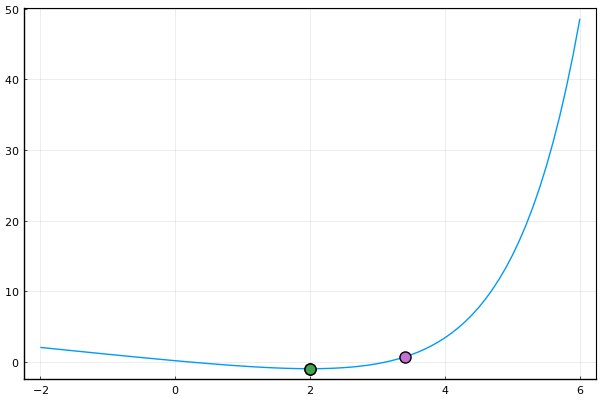

In [13]:
using Plots
pyplot()
x = -2:0.1:6
plot(x, f.(x), label="")
scatter!([a b c], [f(a) f(b) f(c)], markersize = 8, framestyle = :box, label="")